# Linear Regression Project on the Data - Ames Data

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the Data**

In [2]:
data = pd.read_csv("Ames_Housing_Data.csv")
data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


**Checking the Highest Correlation with the Sale Price**

In [3]:
data.corr(numeric_only=True)["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

**Scatter Plot of 'Overall Quality' which having the highest correlation with Sale Price to check the Outlier Value**

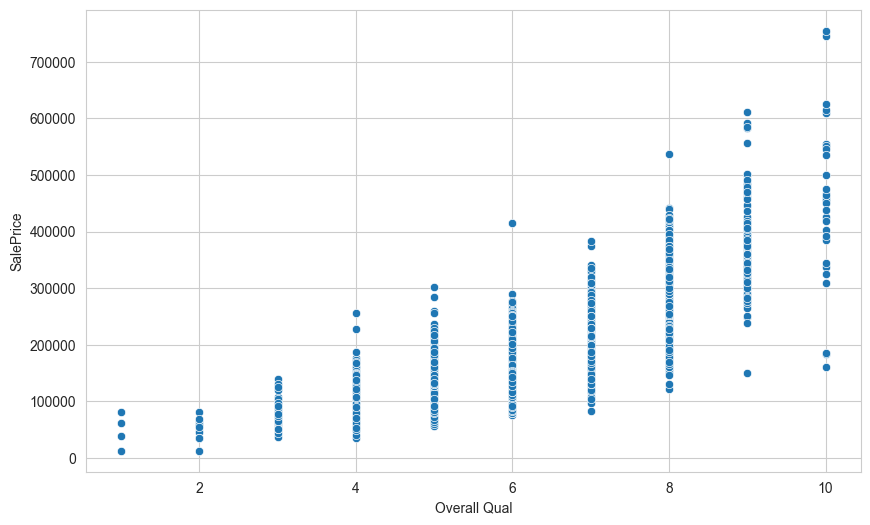

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Overall Qual", y="SalePrice", data=data);

**Seeing the values of outlier of Overall Quality**

In [5]:
data[(data["Overall Qual"]>8) & (data["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


**Scatter Plot of 'Greater Living Area' which having the second-highest correlation with Sale Price to check the Outlier Value**

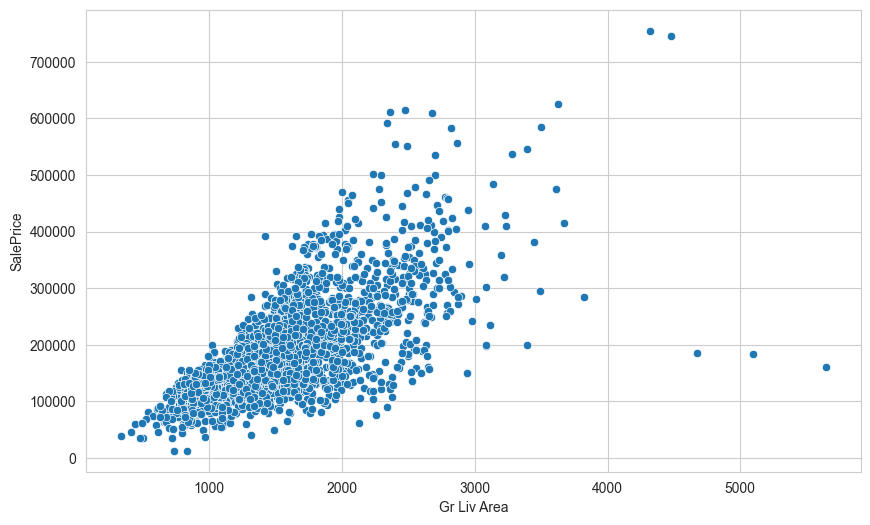

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=data);

**Seeing the values of outlier of Greater Living Area**

In [7]:
data[(data["Gr Liv Area"]>4000) & (data["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


**Storing the values of Outliers to remove it and finally visualize Greater Living Area and Overall Quality**

In [8]:
drop_index = data[(data["Gr Liv Area"]>4000) & (data["SalePrice"]<200000)].index

In [9]:
data = data.drop(drop_index, axis=0)

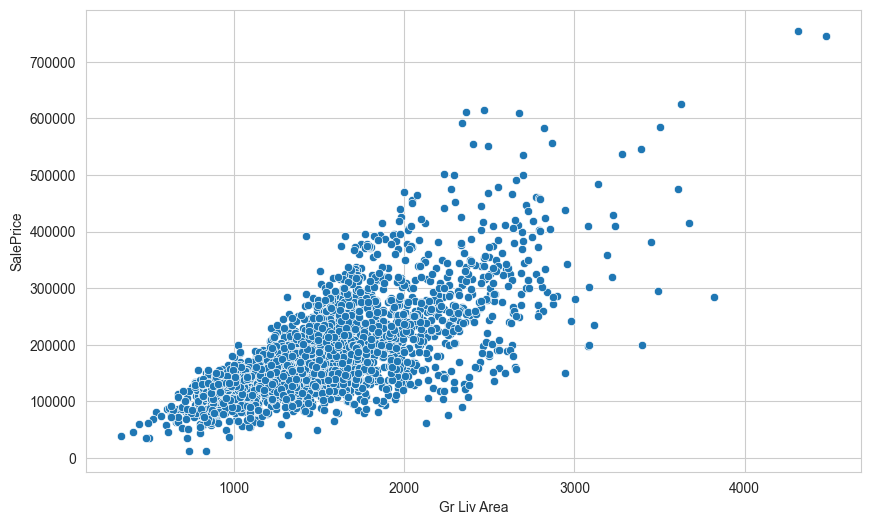

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=data);

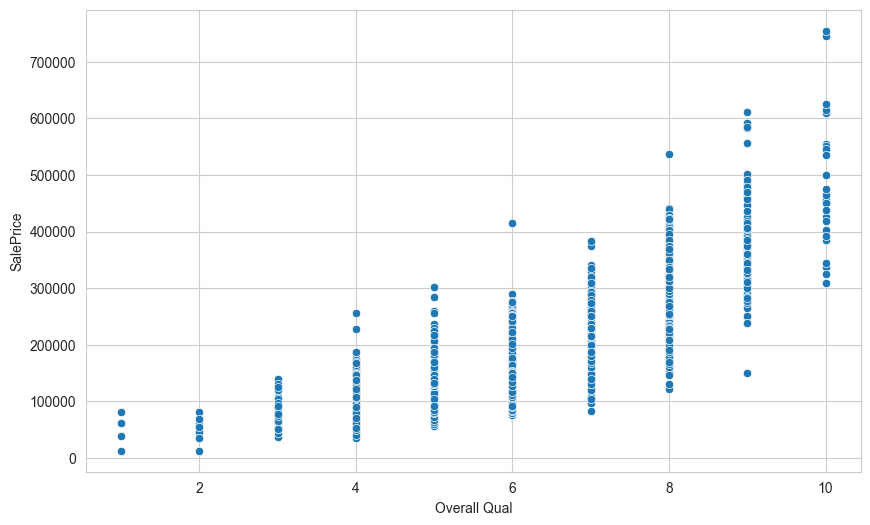

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Overall Qual", y="SalePrice", data=data);

**Feature Description for the Ames Housing Datset**

In [12]:
with open("Ames_Housing_Feature_Description.txt") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

**Finding the missing data in the dataset**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual     29

**Dropping the PID columns feature coz of unrelevant**

In [14]:
data = data.drop(columns="PID")

**Defining the function of percent missing in the data and visualizing it**

In [15]:
def percent_missing(dataframe):
    percent_nan = dataframe.isnull().sum()/len(dataframe)*100
    return percent_nan[percent_nan>0].sort_values(ascending=False)

In [16]:
percent_nan = percent_missing(data)

In [17]:
percent_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64

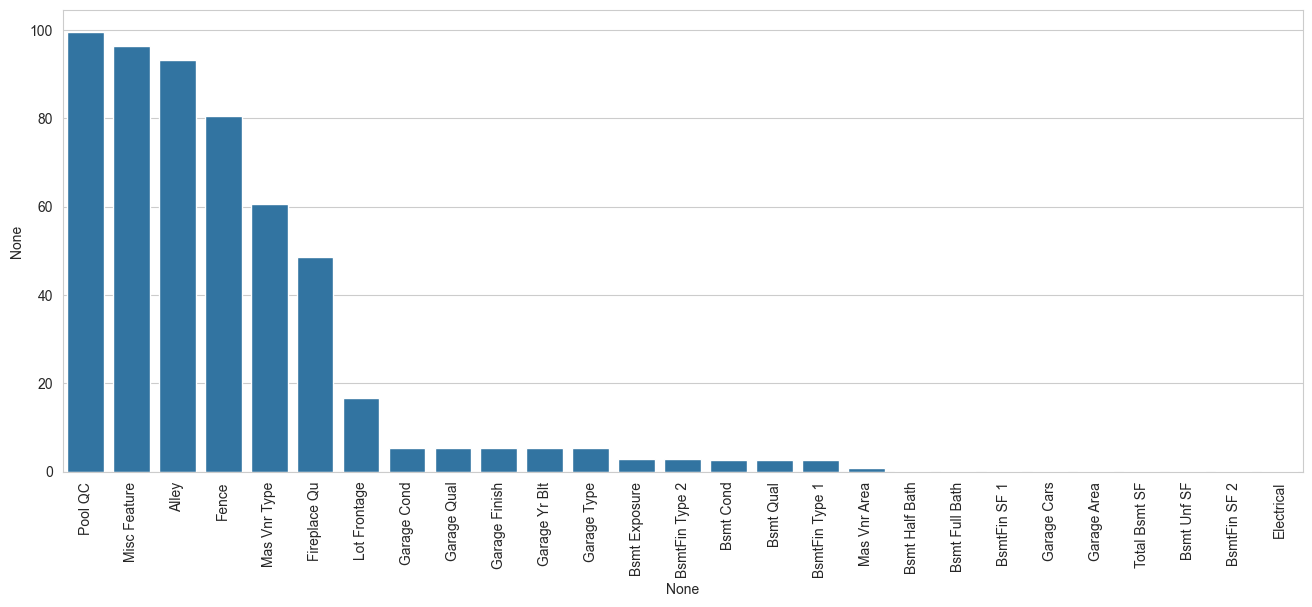

In [18]:
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

**Visualizing the Percent Missing between 0 and 1**

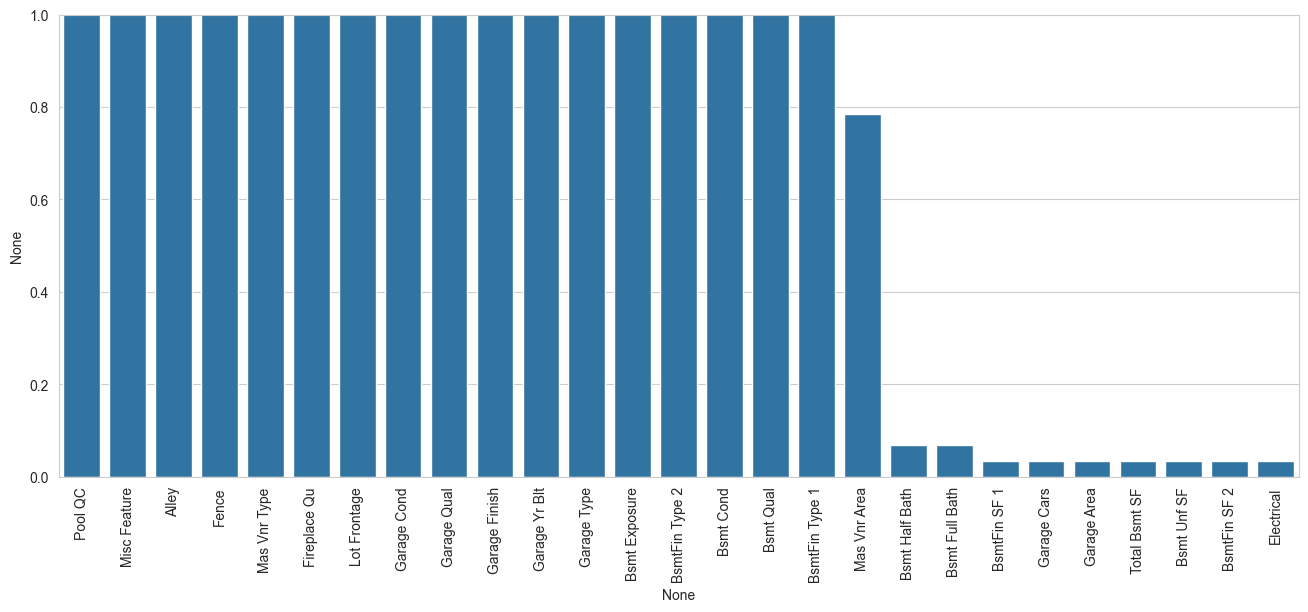

In [19]:
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

In [20]:
percent_nan[percent_nan<1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

**Dropping the Feature of Electrical and Garage Area because of unrelevant and can't be able to fill**

In [21]:
data = data.dropna(axis=0, subset=["Electrical", "Garage Area"])

In [22]:
percent_nan = percent_missing(data)

In [23]:
percent_nan[percent_nan<1]

Mas Vnr Area      0.786325
Bsmt Half Bath    0.068376
Bsmt Full Bath    0.068376
BsmtFin SF 1      0.034188
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
Total Bsmt SF     0.034188
dtype: float64

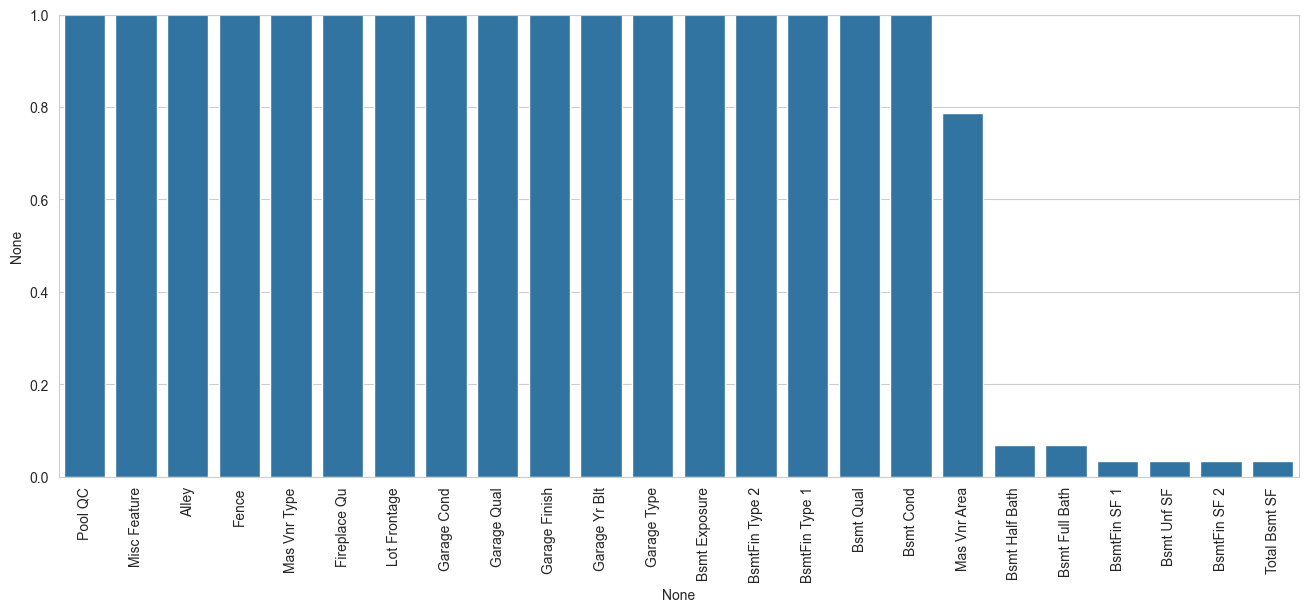

In [24]:
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

**Inspection of the all Basement Feature**

In [25]:
data[data["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [26]:
data[data["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [27]:
data[data["BsmtFin SF 1"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [28]:
data[data["Bsmt Unf SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [29]:
data[data["BsmtFin SF 2"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [30]:
data[data["Total Bsmt SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


**Filling the Basement Feature with Numbers with 0 and String with None**

In [31]:
bsmt_num_cols = ["BsmtFin SF 1", "BsmtFin SF 2", "Total Bsmt SF", "Bsmt Unf SF", "Bsmt Half Bath", "Bsmt Full Bath"]
data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)

bsmt_str_cols = ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2"]
data[bsmt_str_cols] = data[bsmt_str_cols].fillna("None")

In [32]:
percent_nan = percent_missing(data)

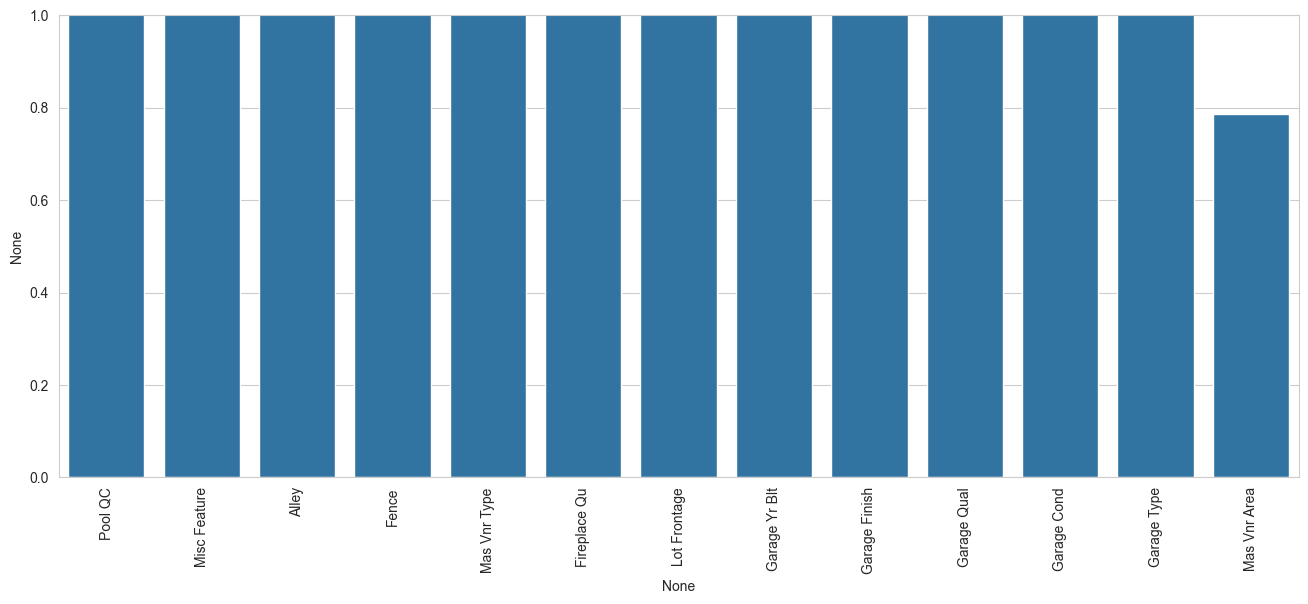

In [33]:
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.ylim(0,1)
plt.xticks(rotation=90);

**Filling the None of Area with 0 and Drop the Area**

In [34]:
data["Mas Vnr Area"] = data["Mas Vnr Area"].fillna(0)

data= data.drop(columns="Mas Vnr Type")

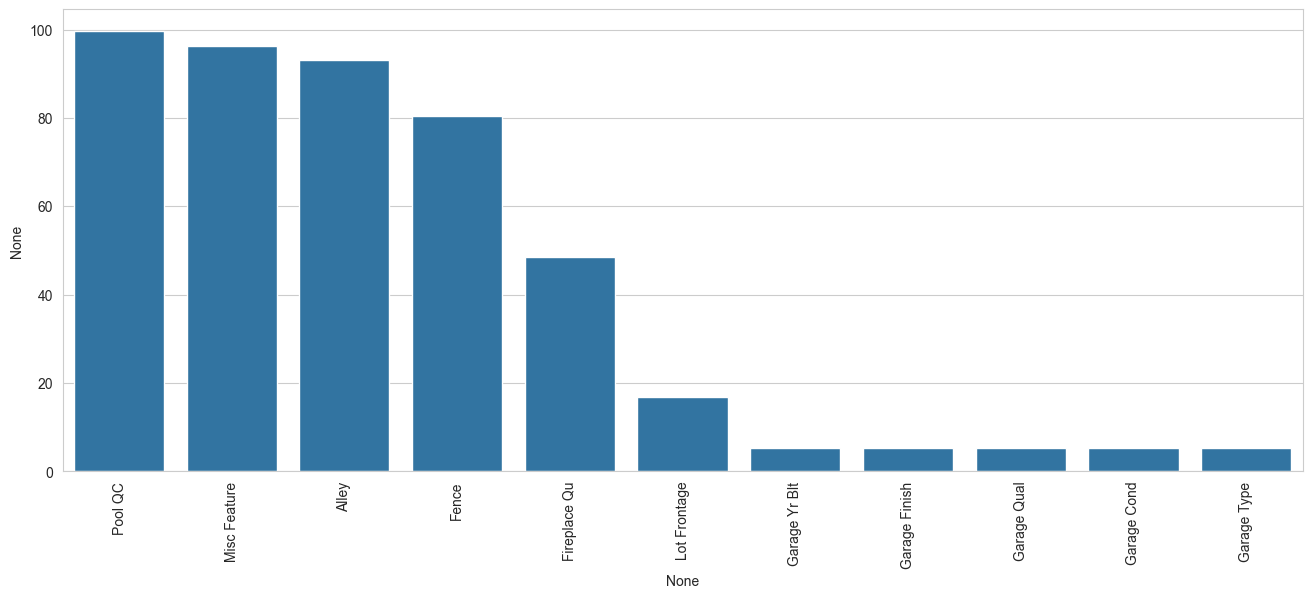

In [35]:
percent_nan = percent_missing(data)
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

**Filling the Garage String Field with None and Garage Year with 0**

In [36]:
garage_str_cols = ["Garage Finish", "Garage Qual", "Garage Cond", "Garage Type"]
data[garage_str_cols] = data[garage_str_cols].fillna("None")

data["Garage Yr Blt"] = data["Garage Yr Blt"].fillna(0)

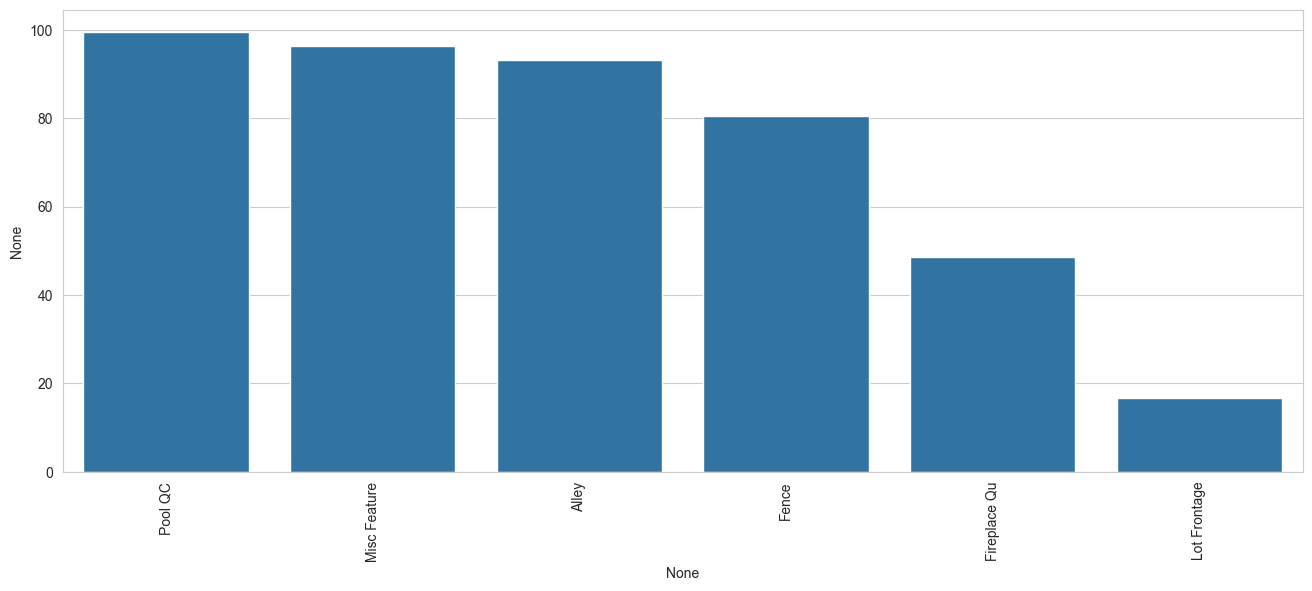

In [37]:
percent_nan = percent_missing(data)
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

**Dropping the feature who's having maximum missing percentage**

In [38]:
data = data.drop(columns=["Pool QC", "Misc Feature", "Alley", "Fence"])

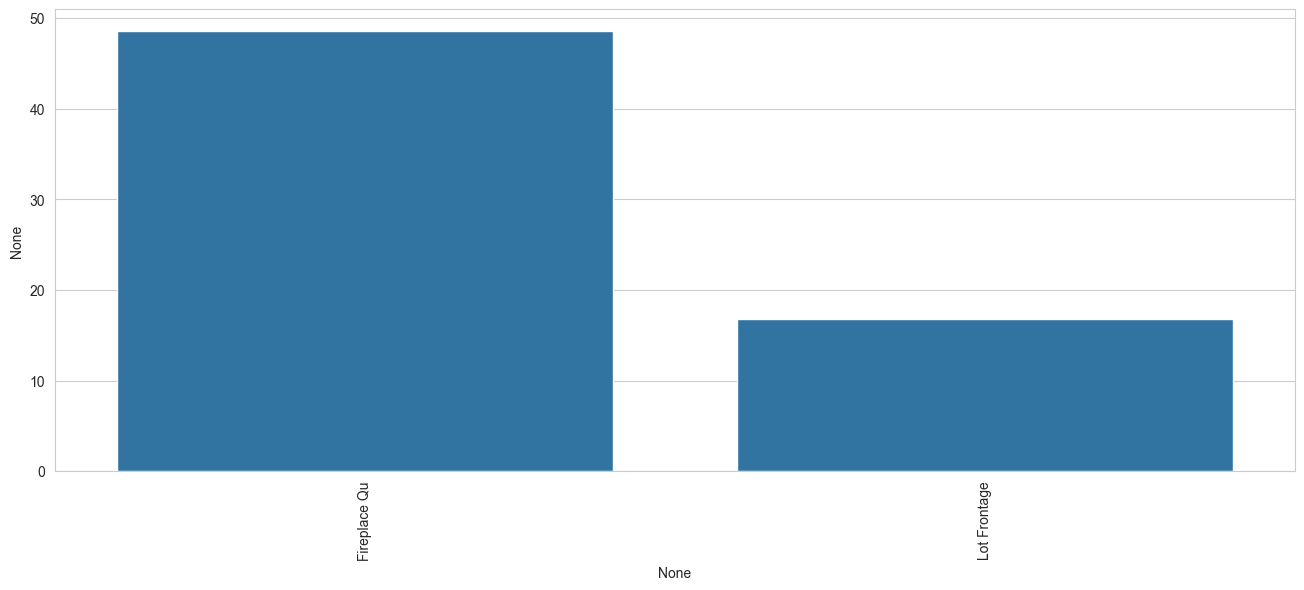

In [39]:
percent_nan = percent_missing(data)
plt.figure(figsize=(16, 6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

**Filling the missing 'Fireplace Qu' with None and Filling the 'Lot Frontage' with mean value with GroupBy**

In [40]:
data["Fireplace Qu"] = data["Fireplace Qu"].fillna("None")

In [41]:
data["Lot Frontage"] = data.groupby("Neighborhood")["Lot Frontage"].transform(lambda x : x.fillna(x.mean()))

**Some Values are still None because their values didn't take so fill with 0**

In [42]:
data["Lot Frontage"] = data["Lot Frontage"].fillna(0)

In [43]:
data["MS SubClass"] = data["MS SubClass"].apply(str)

In [44]:
my_object_data = data.select_dtypes(include="object")

In [45]:
my_numeric_data = data.select_dtypes(exclude="object")

**One Hot Encoding of the Object Data Type and then Concatenate with the Numeric Data**

In [46]:
data_objects_dummies = pd.get_dummies(my_object_data, drop_first=True)

In [47]:
final_data = pd.concat([my_numeric_data, data_objects_dummies], axis=1)

**Checking the Final Highest Correlation with Sale Price** 

In [48]:
final_data.corr()["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.802637
Gr Liv Area          0.727279
Total Bsmt SF        0.660983
Garage Cars          0.648488
                       ...   
Garage Finish_Unf   -0.422363
Bsmt Qual_TA        -0.453022
Fireplace Qu_None   -0.481740
Kitchen Qual_TA     -0.527461
Exter Qual_TA       -0.591459
Name: SalePrice, Length: 270, dtype: float64

**Splitting the Independent and Dependent Features**

In [49]:
x = final_data.drop(columns="SalePrice")
y = final_data["SalePrice"]

**Splitting the Training and Testing Data**

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=17)

**Scaling the Training and Testing with Training Fitting**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Implementing the Elastic Net** 

In [52]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(max_iter=1000000)

**Creating the Parameters of Alpha and L1 Ratio so found out which is the best parameters with Grid Search CV**

In [53]:
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]}

In [54]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring="neg_mean_absolute_error", cv=5, verbose=2)

**Training the model on the Training and Testing**

In [55]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.5s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_absolute_error', verbose=2)

**Printing the Best Parameters**

In [56]:
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1, max_iter=1000000)

In [57]:
cv_result = pd.DataFrame(grid_model.cv_results_)

In [58]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.311868,0.043965,0.001114,0.000673,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-15083.925285,-16175.199255,-15415.782971,-13752.480380,-15510.111338,-15187.499846,800.218725,8
1,0.406193,0.035483,0.001732,0.000424,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-15109.894923,-16108.483967,-15224.522309,-13828.101605,-15447.688626,-15143.738286,743.194637,5
2,1.166400,0.784529,0.003221,0.001941,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-15149.517585,-16076.522324,-15145.426883,-13893.841775,-15456.936893,-15144.449092,711.400653,6
3,2.029072,0.882363,0.001404,0.000496,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-15357.492792,-16166.291768,-15102.139086,-14151.927650,-15658.074136,-15287.185086,669.086226,11
4,4.304152,1.022650,0.001517,0.000447,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-15450.757416,-16282.197017,-15137.833672,-14245.495568,-15654.181649,-15354.093064,668.809485,12
5,72.116715,24.316466,0.001194,0.000403,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-15538.104068,-16367.175145,-15270.711873,-14289.822530,-15984.406516,-15490.044026,707.771329,16
6,0.057002,0.007398,0.001514,0.000644,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-16571.193309,-17372.562776,-17822.841414,-15428.034988,-16938.110828,-16826.548663,815.380111,21
7,0.068295,0.003611,0.001406,0.000500,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-15732.143932,-16760.062771,-16790.215539,-14512.345491,-16289.853654,-16016.924278,844.935715,20
8,0.073210,0.002376,0.001003,0.000632,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-15330.093200,-16478.566032,-16228.918838,-13999.711294,-15922.924340,-15592.042741,883.759508,17
9,0.164960,0.025377,0.001248,0.000457,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-15107.076545,-16105.077277,-15222.957224,-13825.033126,-15447.027244,-15141.434284,743.334827,4


**Predicting the Testing Data with model**

In [59]:
y_pred = grid_model.predict(x_test)

**Evaluating the Performance Matrices**

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16250.831099479698
Mean Squared Error: 611404094.9793514
Root Mean Squared Error: 24726.586804072886
